In [24]:
import pathlib
import sys
import os

# Hacky way to get to root package
if "notebooks" in os.getcwd():
    os.chdir("..")

In [25]:
%load_ext autoreload
%autoreload 2
    
import sys
from data_container import load_scouted_data, get_Teams_in_Match, load_pit_data
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
scouted_data = load_scouted_data()
scouted_data

,Scouter Initials,Match Number,Team Number,No Show,Auto Fuel,Auto Climbing Status,Auto Human Player Score,Teleop Fuel,Teleop Human Player Score,Endgame Climbing Level
0,abc,1,1678,False,14,True,12,49,6,L1
1,abc,1,3504,True,15,True,10,20,3,NaN
2,abc,1,8393,False,13,False,6,152,8,L2
3,abc,1,118,True,9,True,2,175,5,L1
4,abc,1,254,True,4,False,3,12,18,L3
5,abc,1,67,False,12,True,16,98,13,L1
6,abc,2,8393,False,7,False,10,190,8,L1
7,abc,2,67,True,15,True,7,144,30,L2
8,abc,2,118,True,3,True,14,64,26,NaN
9,abc,2,1678,False,2,False,1,198,0,L2


In [31]:
teams = get_Teams_in_Match()
match_data = scouted_data.loc[scouted_data["Team Number"].isin(teams)].reset_index()
print(match_data)

    index Scouter Initials Match Number Team Number  No Show  Auto Fuel  \
0       0              abc            1        1678    False         14   
1       1              abc            1        3504     True         15   
2       2              abc            1        8393    False         13   
3       3              abc            1         118     True          9   
4       4              abc            1         254     True          4   
5       5              abc            1          67    False         12   
6       6              abc            2        8393    False          7   
7       7              abc            2          67     True         15   
8       8              abc            2         118     True          3   
9       9              abc            2        1678    False          2   
10     11              abc            2        3504    False         24   
11     12              abc            3          67    False          6   
12     14              ab

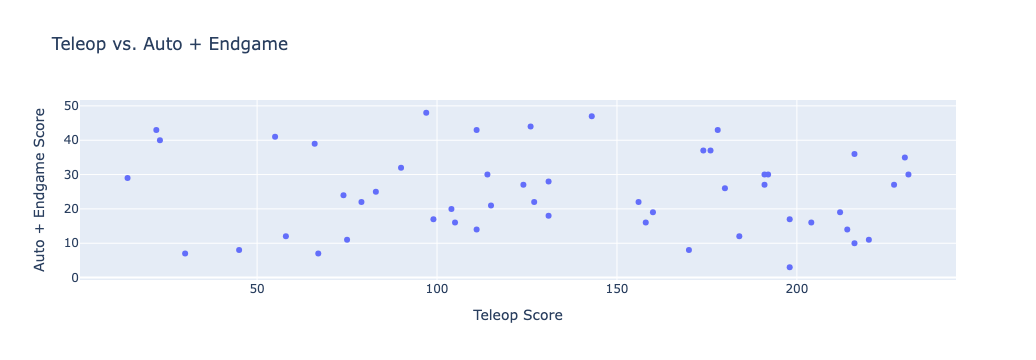

In [32]:
# Convert all numeric columns, filling NaN with 0
numeric_cols = ["Auto Fuel", "Auto Human Player Score", "Teleop Fuel", 
                "Teleop Human Player Score", "Endgame Climbing Level"]
for col in numeric_cols:
    if col in match_data.columns:
        match_data[col] = pd.to_numeric(match_data[col], errors='coerce').fillna(0)

# Handle boolean column
match_data["Auto Climbing Status"] = match_data["Auto Climbing Status"].fillna(False)
if match_data["Auto Climbing Status"].dtype == 'object':
    match_data["Auto Climbing Status"] = match_data["Auto Climbing Status"].astype(str).str.lower().isin(['true', '1', 'yes'])

# Calculate
match_data["All Auto"] = match_data["Auto Fuel"] + match_data["Auto Human Player Score"]
match_data.loc[match_data["Auto Climbing Status"], "All Auto"] += 15
match_data["All Teleop"] = match_data["Teleop Fuel"] + match_data["Teleop Human Player Score"]
match_data["All Endgame"] = match_data["Endgame Climbing Level"]
match_data["Auto and Endgame"] = match_data["All Auto"] + match_data["All Endgame"]

# Create the plot with Team Number in hover data
fig = px.scatter(
    match_data, 
    x="All Teleop", 
    y="Auto and Endgame", 
    title="Teleop vs. Auto + Endgame",
    hover_data={
        "Team Number": True,  # Show team number
        "All Teleop": True,   # Show x value
        "Auto and Endgame": True,  # Show y value
        "All Auto": True,     # Show auto score
        "All Endgame": True   # Show endgame score
    },
    custom_data=["Team Number"]  # Optional: for advanced hover formatting
)

# Update hover template for better formatting
fig.update_traces(
    hovertemplate="<br>".join([
        "Team: <b>%{customdata[0]}</b>",
        "Teleop Score: %{x}",
        "Auto + Endgame: %{y}",
        "Auto Score: %{marker.customdata[0]}" if 'customdata' in fig.data[0] else ""
    ])
)

# Alternative simpler hover approach:
# fig.update_traces(
#     hovertemplate=(
#         "<b>Team %{customdata[0]}</b><br>"
#         "Teleop: %{x}<br>"
#         "Auto+Endgame: %{y}<extra></extra>"
#     )
# )

# Update layout for better readability
fig.update_layout(
    xaxis_title="Teleop Score",
    yaxis_title="Auto + Endgame Score",
    hovermode="closest"  # Shows the nearest point on hover
)

fig.show()

   Scouter Initials Match Number Team Number  No Show  Auto Fuel  \
0               abc            1        1678    False         14   
1               abc            1        3504     True         15   
2               abc            1        8393    False         13   
3               abc            1         118     True          9   
4               abc            1         254     True          4   
5               abc            1          67    False         12   
6               abc            2        8393    False          7   
7               abc            2          67     True         15   
8               abc            2         118     True          3   
9               abc            2        1678    False          2   
10              abc            2        2056     True         10   
11              abc            2        3504    False         24   
12              abc            3          67    False          6   
13              abc            3        4467    

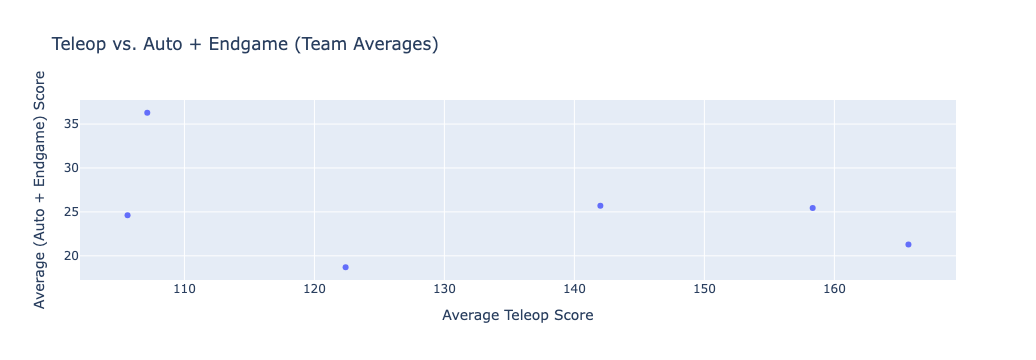

In [37]:
print(scouted_data)
print(match_data)
# Convert all numeric columns, filling NaN with 0
numeric_cols = ["Auto Fuel", "Auto Human Player Score", "Teleop Fuel", 
                "Teleop Human Player Score", "Endgame Climbing Level"]
for col in numeric_cols:
    if col in match_data.columns:
        match_data[col] = pd.to_numeric(match_data[col], errors='coerce').fillna(0)

# Handle boolean column - convert to numeric for averaging
match_data["Auto Climbing Status"] = match_data["Auto Climbing Status"].fillna(False)
if match_data["Auto Climbing Status"].dtype == 'object':
    match_data["Auto Climbing Status"] = match_data["Auto Climbing Status"].astype(str).str.lower().isin(['true', '1', 'yes'])

# Convert boolean to numeric (0 or 1) for averaging
match_data["Auto Climbing Status Numeric"] = match_data["Auto Climbing Status"].astype(int)

# Calculate individual match scores
match_data["All Auto"] = match_data["Auto Fuel"] + match_data["Auto Human Player Score"]
match_data.loc[match_data["Auto Climbing Status"], "All Auto"] += 15
match_data["All Teleop"] = match_data["Teleop Fuel"] + match_data["Teleop Human Player Score"]
match_data["All Endgame"] = match_data["Endgame Climbing Level"]
match_data["Auto and Endgame"] = match_data["All Auto"] + match_data["All Endgame"]

# Group by Team Number and calculate averages
team_stats = match_data.groupby("Team Number").agg({
    "All Teleop": "mean",
    "Auto and Endgame": "mean",
    "All Auto": "mean",
    "All Endgame": "mean",
    "Auto Climbing Status Numeric": "mean",  # Average climb success rate
    "Auto Fuel": "mean",
    "Auto Human Player Score": "mean",
    "Teleop Fuel": "mean",
    "Teleop Human Player Score": "mean",
    "Endgame Climbing Level": "mean"
}).reset_index()

# Rename columns to indicate they're averages
team_stats = team_stats.rename(columns={
    "All Teleop": "Avg Teleop",
    "Auto and Endgame": "Avg Auto+Endgame",
    "All Auto": "Avg Auto",
    "All Endgame": "Avg Endgame",
    "Auto Climbing Status Numeric": "Climb Success Rate",
    "Auto Fuel": "Avg Auto Fuel",
    "Auto Human Player Score": "Avg Auto Human Player",
    "Teleop Fuel": "Avg Teleop Fuel",
    "Teleop Human Player Score": "Avg Teleop Human Player",
    "Endgame Climbing Level": "Avg Endgame Level"
})

print(f"\nTeam averages shape: {team_stats.shape}")
print(f"Number of unique teams: {len(team_stats)}")
print("\nSample of team averages:")
print(team_stats.head())

# Minimal fix - include all data in custom_data
fig = px.scatter(
    team_stats, 
    x="Avg Teleop", 
    y="Avg Auto+Endgame", 
    title="Teleop vs. Auto + Endgame (Team Averages)",
    custom_data=team_stats[["Team Number", "Avg Auto", "Avg Endgame", "Climb Success Rate"]]  # Include ALL data needed
)

fig.update_traces(
    hovertemplate=(
        "<b>Team %{customdata[0]}</b><br>"
        "Avg Teleop: %{x:.1f}<br>"
        "Avg Auto+Endgame: %{y:.1f}<br>"
        "Avg Auto: %{customdata[1]:.1f}<br>"
        "Avg Endgame: %{customdata[2]:.1f}<br>"
        "Climb Success: %{customdata[3]:.1%}<extra></extra>"
    )
)

fig.update_layout(
    xaxis_title="Average Teleop Score",
    yaxis_title="Average (Auto + Endgame) Score"
)

fig.show()